In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from drawarrow import ax_arrow
from pyfonts import load_google_font

In [2]:
spi_indicators = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-11-25/spi_indicators.csv")

In [3]:
spi_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   iso3c                      4340 non-null   object 
 1   country                    4340 non-null   object 
 2   region                     4340 non-null   object 
 3   income                     4340 non-null   object 
 4   year                       4340 non-null   int64  
 5   population                 4340 non-null   int64  
 6   overall_score              1425 non-null   float64
 7   data_use_score             4340 non-null   float64
 8   data_services_score        1436 non-null   float64
 9   data_products_score        4085 non-null   float64
 10  data_sources_score         1560 non-null   float64
 11  data_infrastructure_score  1519 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 407.0+ KB


In [4]:
spi_indicators.head(2)

,iso3c,country,region,income,year,population,overall_score,data_use_score,data_services_score,data_products_score,data_sources_score,data_infrastructure_score
0,DNK,Denmark,Europe & Central Asia,High income,2023,5946952,95.255833,100.0,98.466667,90.71250,87.100,100.0
1,FIN,Finland,Europe & Central Asia,High income,2023,5584264,95.115417,100.0,96.433333,90.96875,88.175,100.0


In [5]:
# Average overall score per region
df = spi_indicators.groupby("region")["overall_score"].mean().reset_index(name="mean_score").sort_values(by="mean_score", ignore_index=True)

Followed [this](https://coderzcolumn.com/tutorials/data-science/gauge-chart-using-matplotlib) tutorial by Sunny Solanki.

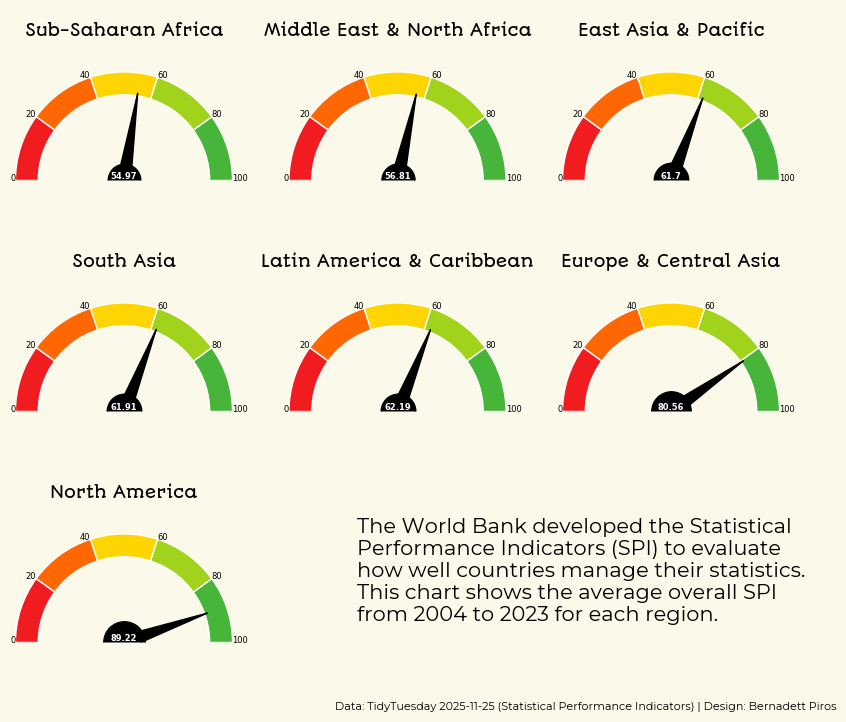

In [6]:
# Load font
font1 = load_google_font("Autour One", weight="regular")
font2 = load_google_font("Montserrat")

# Text params
text_style=dict(font=font1, size=12)

# Wedge colors
colors = ["#46B539", "#A1D31D", "#FFD501", "#FF6702", "#F11C20"]

# Wedge outer values
values = [100, 80, 60, 40, 20, 0]

# Create figure with polar axes
fig, axes = plt.subplots(3, 3, figsize=(10, 9), subplot_kw={"projection": "polar"})

# Adjust horizontal space between axes
plt.subplots_adjust(hspace=0)

# Number of wedges
num_wedges = 5

# Create 5 equal angles between 0 and 180 degrees in radians
angles = np.linspace(0, np.pi, num_wedges, endpoint=False)

# Bar width 
width = np.pi / num_wedges

# x coords for outer labels
x_angles = np.linspace(0, np.pi, num_wedges + 1)

# Iterate over the flattened axes 
for i, ax in enumerate(axes.flat):    

    # Use only axes 0-6
    if i < len(df): 
        # Plot bars
        ax.bar(x=angles, width=width, height=0.8, bottom=3, color=colors,
               linewidth=1, edgecolor="white", align="edge")

        # Add outer lables to wedges
        for xa, v in zip(x_angles, values):
            ax.text(x=xa, y=3.8, s=v, size=6, ha="right" if v<=50 else "left")
    
        # Title for the subplot  
        ax.set_title(df["region"].iloc[i], y=0.85,  **text_style)  

        # Scatter plot
        ax.scatter(0, 0, s=df["mean_score"].iloc[i]*10, color="black")

        # Add average score text annotations
        ax.text(0, 0, f'{df["mean_score"].iloc[i].round(2)}', color="white",
                size=6, weight="bold", ha="center", va="bottom")

    
    # Add needle    
        value = df["mean_score"].iloc[i]
        # Calculate the angle in radians based on a percentage value
        angle = np.pi * (100 - value) / 100    
        radius=3.5
        ax_arrow(
            tail_position=(0, 0),
            head_position=(angle, radius),
            color="black",
            width=1,
            head_length=52,
            ax=ax
        )

    # Cut the lower half of the polar axis off
    ax.set_thetamin(0)
    ax.set_thetamax(180)

    # Turn the axis off
    ax.axis("off")

# Background color
fig.set_facecolor("#FBF9EA") 

txt= '''
    The World Bank developed the Statistical
    Performance Indicators (SPI) to evaluate
    how well countries manage their statistics.
    This chart shows the average overall SPI 
    from 2004 to 2023 for each region.
    '''

# Add title
fig.text(0.45, 0.175, s=txt, font=font2, size=15)

# Add caption
fig.text(0.45, 0.1, "Data: TidyTuesday 2025-11-25 (Statistical Performance Indicators) | Design: Bernadett Piros", size=8, font=font2)

# Show the plot
plt.show()

#fig.savefig("2025-11-25.png", bbox_inches="tight", pad_inches=0.2)